# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import vis_tools as vt
import dla_model as dm
import cs_measures as cm
from importlib import reload

## 2. Flow Functions

In [10]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\dla_model.py'>

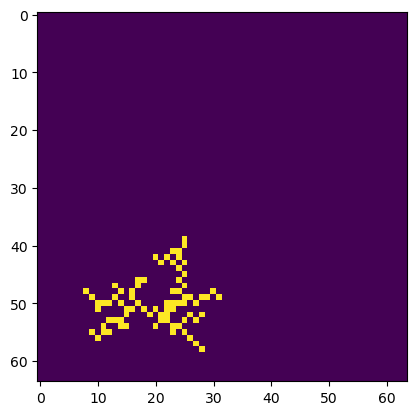

In [17]:
# Time / space parameters
size = 64
steps = 200#0

# Initialize lattice
seeds = np.array([(49, 25)])
lattice = dm.init_lattice(size, seeds)

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density)

# Arrays for storing time frames
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=(False, True), moore=True)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, periodic=(False, True), moore=True)
    # print(f"step {step}: {current_lattice}")

vt.animate_lattice_2D(lattice_frames, interval=10)

## 3. Fractal Dimension

In [40]:
# Reload module
reload(cm)

<module 'cs_measures' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\cs_measures.py'>

In [41]:
print(current_lattice.shape[0])
fractal_dims = cm.fractal_dimension(current_lattice)

64
64
[slice(0, 63, None), slice(0, 63, None)]
77.0
1
64
32
[slice(0, 31, None), slice(0, 31, None)]
0.0
[slice(32, 63, None), slice(32, 63, None)]
0.0
0
32
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\mihbo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mihbo\AppData\Local\Temp\ipykernel_7992\882537792.py", line 2, in <module>
    fractal_dims = cm.fractal_dimension(current_lattice)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Msc Computational Science\S01P03\Complex System Simulation\00 Github\complex-system-simulation\Project\Code\cs_measures.py", line 43, in fractal_dimension
    dim_box = math.log(n_box_occupied) / math.log(box_size)
              ^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: math domain error

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\mihbo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^